In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [41]:
(Xtrain, ytrain),(Xtest, ytest) = fashion_mnist.load_data()

In [42]:
Xtrain.shape

(60000, 28, 28)

In [43]:
Xtest.shape

(10000, 28, 28)

In [7]:
Xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
Xtrain[0].max()

255

In [9]:
Xtrain[0].min()


0

In [11]:
import matplotlib.pyplot as plt

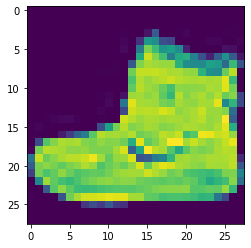

In [12]:
plt.imshow(Xtrain[0])

In [14]:
ytrain[0]

9

In [15]:
label = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker", "Bag","Ankle boot"]

In [16]:
label[ ytrain[0]]

'Ankle boot'

###  Scaling 

In [45]:
Xtrain = Xtrain.reshape(-1, 28*28)/255

In [46]:
Xtest = Xtest.reshape(-1, 28*28)/255

In [47]:
Xtrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
Xtrain[0].max()

1.0

In [21]:
Xtrain[0].min()

0.0

In [22]:
Xtest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

###  Functional Model

In [68]:
from tensorflow.keras.models import Model

In [69]:
from tensorflow.keras.layers import Dense,Input

In [70]:
feed = Input(shape = (784,))

In [71]:
feed

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input_3')>

In [72]:
hid1 = Dense(512, activation =  'relu')(feed)

In [73]:
hid2 = Dense(256, activation = 'relu')(hid1)

In [74]:
hid2

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_10')>

In [75]:
hid3 = Dense(128, activation = 'relu')(hid2)

In [76]:
out = Dense(10, activation = 'softmax')(hid3)

In [77]:
fmodel1 = Model(inputs = feed, outputs = out)

In [78]:
fmodel1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [89]:
fmodel1.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001), 
                loss = "sparse_categorical_crossentropy", 
                metrics=['accuracy'])

In [90]:
fmodel1.fit(Xtrain, ytrain, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1411 - accuracy: 0.9453
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1289 - accuracy: 0.9491
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1222 - accuracy: 0.9512
Epoch 4/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1173 - accuracy: 0.9527
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1128 - accuracy: 0.9548
Epoch 6/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1089 - accuracy: 0.9559
Epoch 7/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1051 - accuracy: 0.9576
Epoch 8/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1013 - accuracy: 0.9592
Epoch 9/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0975 - accuracy: 0.9611
Epoch 10/15
1875/1875 [==============================] - 15s 8ms/step - l

In [91]:
ypred = fmodel1.predict(Xtest)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
ypred

array([[1.1460529e-19, 4.5307908e-19, 7.7277751e-26, ..., 1.7400571e-13,
        4.8681285e-24, 1.0000000e+00],
       [1.5717593e-08, 4.0888848e-17, 9.9902546e-01, ..., 2.4054443e-19,
        1.2680118e-17, 6.6294059e-23],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.1133390e-17, 1.9111231e-35, 2.2735235e-23, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.2572547e-11, 1.0957335e-28, 5.9240326e-17, ..., 3.3505977e-19,
        1.7879536e-19, 7.6295256e-20]], dtype=float32)

In [94]:
ypred = ypred.argmax(axis = 1)

In [95]:
accuracy_score(ytest, ypred)

0.9026

In [86]:
from tensorflow import  keras

In [96]:
keras.optimizers.Adam(learning_rate=0.0001)

###  Functional Model _ 2

In [97]:
from tensorflow.keras.layers import Dense, Input

In [116]:
inp = Input(shape  = (784,))

In [117]:
hidden1 = Dense(512, activation = 'relu')

In [118]:
hidden2 = Dense(256, activation = 'relu')

In [119]:
out = Dense(10, activation = 'softmax')

In [120]:
x1 = hidden1(inp)

In [121]:
y1 = hidden2(x1)

In [122]:
z1 = out(y1)

In [123]:
fmodel2 = Model(inputs= inp, outputs = z1)

In [124]:
fmodel2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [129]:
from tensorflow.keras.layers import Flatten

In [125]:
input1  = Input(shape  = (28,28))

In [126]:
h1 = Dense(512, activation = 'relu')

In [127]:
h2 = Dense(256, activation = 'relu')

In [128]:
res = Dense(10, activation = 'softmax')

In [130]:
flat = Flatten()

In [132]:
a1 = flat(input1)

In [133]:
b1 = h1(a1)

In [134]:
c1 = h2(b1)

In [135]:
result = res(c1)

In [136]:
fmodel3 = Model(inputs = input1, outputs = result)

In [137]:
fmodel3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               401920    
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
